In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from pathlib import Path
import pickle
import matplotlib.pyplot as plt

base_dir = Path(".").absolute().parents[0]
import sys

if sys.path[0] != base_dir.as_posix():
    sys.path = [base_dir.as_posix()] + sys.path

In [3]:
from spatio_temporal.config import Config
from spatio_temporal.training.trainer import Trainer
from spatio_temporal.training.tester import Tester
from tests.utils import (
    create_linear_ds,
    _test_sklearn_model,
    get_pollution_data_beijing,
)
from spatio_temporal.training.eval_utils import _plot_loss_curves, save_losses

# Load in Data

In [4]:
ds = create_linear_ds()
ds

<xarray.Dataset>
Dimensions:  (lat: 10, lon: 10, time: 252)
Coordinates:
  * lat      (lat) float64 -55.15 -40.69 -26.22 -11.76 ... 46.1 60.56 75.02
  * lon      (lon) float64 -180.0 -140.0 -100.0 -60.0 ... 60.0 100.0 140.0 180.0
  * time     (time) datetime64[ns] 2000-01-31 2000-02-29 ... 2020-12-31
Data variables:
    feature  (lat, lon, time) float64 9.0 65.0 96.0 26.0 ... 53.0 29.0 73.0 nan
    target   (lat, lon, time) float64 241.5 31.5 227.5 ... 185.5 101.5 255.5

# Load in Config File

In [5]:
cfg = Config(base_dir / "configs/test_config.yml")
cfg

{'autoregressive': False,
 'batch_size': 30,
 'data_dir': PosixPath('data'),
 'experiment_name': 'test',
 'hidden_size': 64,
 'horizon': 1,
 'input_variables': ['feature'],
 'learning_rate': 0.01,
 'loss': 'MSE',
 'n_epochs': 2,
 'num_workers': 4,
 'optimizer': 'Adam',
 'run_dir': None,
 'seed': 1234,
 'seq_length': 1,
 'target_variable': 'target',
 'test_end_date': Timestamp('2020-12-31 00:00:00'),
 'test_start_date': Timestamp('2016-01-31 00:00:00'),
 'train_end_date': Timestamp('2015-12-31 00:00:00'),
 'train_start_date': Timestamp('2003-01-31 00:00:00'),
 'validation_end_date': Timestamp('2002-12-31 00:00:00'),
 'validation_start_date': Timestamp('2000-01-31 00:00:00')}

# Create Trainer

In [6]:
trainer = Trainer(cfg, ds)

Loading Data: 100%|██████████| 100/100 [00:00<00:00, 677.08it/s]


In [7]:
len(trainer.train_dl)
trainer.train_dl.batch_size

30

In [8]:
losses = trainer.train_and_validate()

Training Epoch 2:   0%|          | 0/514 [00:00<?, ?it/s]

Train Loss: 0.03
Valid Loss: 0.01


Validation Epoch 2: 100%|██████████| 114/114 [00:05<00:00, 22.34it/s]

Train Loss: 0.01
Valid Loss: 0.01


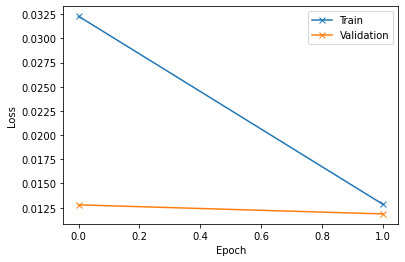

In [9]:
train_losses, valid_losses = losses
f, ax = plt.subplots()
ax.plot(train_losses, label="Train", color="C0", marker="x")
ax.plot(valid_losses, label="Validation", color="C1", marker="x")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
plt.legend()